In [1]:
from radd import build, models, fit, vis
from radd.toolbox import thetahttp://localhost:8889/notebooks/ELIFE_FINAL/Untitled3.ipynb?kernel_name=python2#

In [52]:
from radd import CORE
build=reload(build)

In [121]:
df=mx.data.copy()
df['r'] = np.where(mx.data.rt<.555, 1, 0)


In [101]:
df[df.r==1].groupby('pGo').rt.mean()
df.rt = np.round(df.rt, 3)

In [119]:
np.median(mx.observed.std()[6:])/mx.observed.std()[6:]

hi10    2.2870e-01
hi30    3.4720e-01
hi50    6.0424e-01
hi70    2.1184e+00
hi90    1.4714e+01
lo10    3.6908e-01
lo30    9.8589e-01
lo50    1.0145e+00
lo70    3.9163e+12
lo90    1.0016e+01
dtype: float64

In [102]:
mx = build.Model(data=df, kind='xpro', dynamic='exp', depends_on={'xb':'pGo'})
mx.make_optimizer(tol=1.e-20, ntrials=10000, maxfev=5000, multiopt=True)
opt = mx.opt
mx.make_simulator()
simfx = mx.simulator.sim_fx

0.55
0.55


In [ ]:
mxdata

In [83]:
prob=np.array([.1, .3, .5, .7, .9])
upper = mx.data[mx.data.isin([.6,.8,1.0])].response.mean()
lower = mx.data[mx.data.pGo.isin([.2,.4,.6])].response.mean()
qvar = mx.observed.std().iloc[6:].values
hi = qvar[:5]; lo = qvar[5:]
qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])

pvar = mx.data.groupby('pGo').std().response.values
#psub1 = np.median(pvar[:-1])/pvar[:-1]
#pwts = np.append(psub1, psub1.max())
#pwts = np.array([1.5,1,1,1,1,1.5])
#mx.wts = np.hstack([pwts, qwts])
qvar = mx.observed.std().iloc[6:].values.reshape(2, len(prob))
qr = np.median(qvar)/qvar
qwts = np.append(upper*qr[:5], lower*qr[5:])
#wt_hi = upper*sq_ratio[0, :]
#wt_lo = lower*sq_ratio[1, :]
mx.wts = np.hstack([pwts, wt_hi, wt_lo])

#qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])
#pwts = np.array([1.5,  1,  1,  1,  2, 2])
#mx.wts = np.hstack([pwts, qwts])


In [123]:
mx.observed

,0,20,40,60,80,100,hi10,hi30,hi50,hi70,hi90,lo10,lo30,lo50,lo70,lo90
idx,,,,,,,,,,,,,,,,
28,1.0000,0.7500,0.5823,0.3797,0.0625,0.0116,0.5050,0.5190,0.532,0.5450,0.545,0.5450,0.545,0.545,0.545,0.5450
29,1.0000,0.8481,0.6538,0.4342,0.0167,0.0571,0.5050,0.5180,0.532,0.5450,0.545,0.5450,0.545,0.545,0.545,0.5450
30,1.0000,0.8750,0.6625,0.4000,0.1125,0.0179,0.5450,0.5450,0.545,0.5450,0.545,0.5450,0.545,0.545,0.545,0.5450
31,0.9375,0.8750,0.5000,0.2821,0.1159,0.0476,0.5180,0.5450,0.545,0.5450,0.545,0.5375,0.545,0.545,0.545,0.5450
32,0.9375,0.6709,0.5063,0.3750,0.0897,0.0865,0.5450,0.5450,0.545,0.5450,0.546,0.5450,0.545,0.545,0.545,0.5451
33,0.9500,0.7375,0.5195,0.1507,0.0986,0.0303,0.5180,0.5450,0.545,0.5450,0.545,0.5450,0.545,0.545,0.545,0.5450
34,1.0000,0.8500,0.6795,0.5500,0.1410,0.0204,0.5180,0.5320,0.545,0.5450,0.545,0.5450,0.545,0.545,0.545,0.5450
35,0.9091,0.7250,0.5325,0.2179,0.0588,0.0102,0.5050,0.5180,0.532,0.5450,0.545,0.5079,0.545,0.545,0.545,0.5450
36,1.0000,0.8625,0.6375,0.3125,0.1000,0.0857,0.5320,0.5450,0.545,0.5450,0.545,0.5450,0.545,0.545,0.545,0.5456


In [114]:
#np.set_printoptions(suppress=True, precision=4)


array([  1.0000e+00,   1.0000e+00,   1.0000e+00,   1.0000e+00,
         1.0000e+00,   1.0000e+00,   3.0000e-01,   5.0000e-01,
         9.0000e-01,   3.2000e+00,   2.2100e+01,   1.0000e-01,
         3.0000e-01,   3.0000e-01,   1.0502e+12,   2.7000e+00])

In [66]:
np.median(mx.observed.std().iloc[6:].reshape(2,5), axis=1)[:,None]/mx.observed.std().iloc[6:].reshape(2,5)

array([[  0.42243,   0.56206,   1.     ,   3.39768,  54.97916],
       [  0.26816,   0.58555,   1.     ,  54.81244,  13.83708]])

In [57]:
mx.data[mx.data['HL']==2].mean()['response']

0.27595909683618147

In [39]:
mx.get_wts('mj')

In [49]:
from radd.toolbox import analyze
df = analyze.rangl_data(mx.data, data_style='pro', tb=.550, kind='xpro')

In [50]:
df

0.4535148869633201

In [54]:
mx.avg_wts

array([  1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         0.38631,   0.514  ,   0.91449,   3.10715,  50.27796,   0.074  ,
         0.16159,   0.27596,  15.12599,   3.81847])

In [32]:
mx.optimize()

In [18]:
popt={'a': array([ 0.48672,  0.48672,  0.48672,  0.48672,  0.48672,  0.48672]), 'v_0': 1.4204744923605306, 'xb': array([ 1.86673,  1.86673,  1.86673,  1.86673,  1.86673,  1.86673]), 'v': array([ 1.42047,  1.54611,  1.67993,  1.75729,  1.87396,  1.89252], dtype=np.float32), 'tr': array([ 0.29334,  0.29334,  0.29334,  0.29334,  0.29334,  0.29334]), 'v_100': 1.8925194341059219, 'v_60': 1.7572925581377903, 'v_80': 1.8739583821515711, 'v_20': 1.5461146129935177, 'v_40': 1.6799320687772294}

In [21]:
mx.tb=.555
mx.fitparams['tb']=.555
mx.simulator.tb=.555

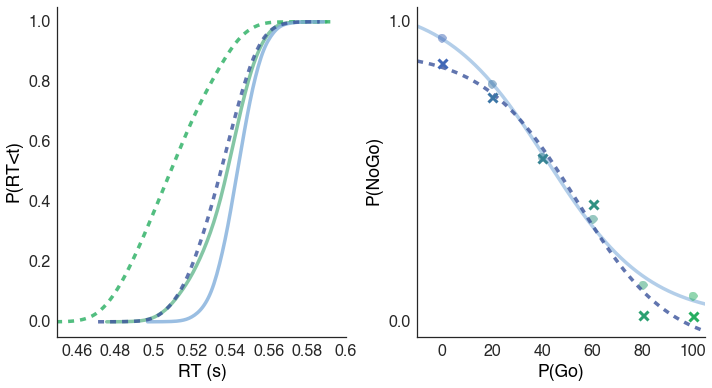

In [33]:
#yhat = array([0.9219, 0.7605, 0.4705, 0.3283, 0.0882, 0.0966, 0.5060, 0.5180, 0.5270, 0.5350, 0.5440, 0.5200, 0.5310, 0.5380, 0.5440, 0.5470])
vis.plot_fits(mx.avg_y, mx.fits, kind='pro', xlim=(.45,.6))